1. titanic 데이터 불러오기
2. null 값 처리
2.1 seaborn 이용해서 그래프 확인
3. 원핫인코딩(전처리과정)
4. 데이터 > train, test 나누기
5. 학습 및 예측/평가
6. 교차 검증

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/files/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Cabin'] = titanic['Cabin'].str[:1]
titanic['Cabin'].fillna('N', inplace=True)
titanic['Embarked'].fillna('N', inplace=True)

In [ ]:
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'Cabin', 'Embarked']]

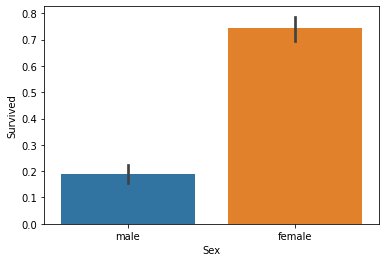

In [ ]:
sb.barplot(x= 'Sex', y= 'Survived', data =  titanic)

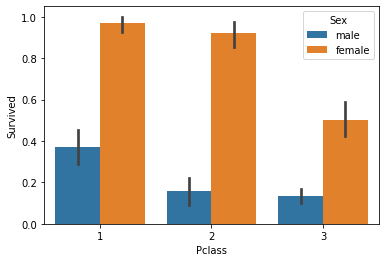

In [ ]:
sb.barplot(x= 'Pclass', y= 'Survived', hue= 'Sex', data = titanic)

# Aggregation 함수 사용

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_

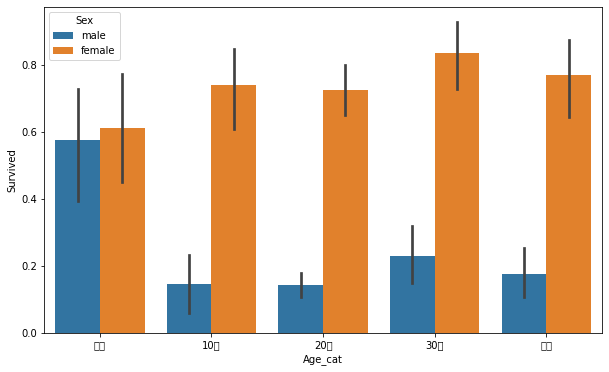

In [ ]:
def get_categoty(age):
  cat=''
  if age <= 10 : cat='유아'
  elif age <= 20 : cat='10대'
  elif age <= 30 : cat='20대'
  elif age <= 40 : cat='30대'
  else : cat='노인'

  return cat

plt.figure(figsize=(10,6))

group_names = ['유아', '10대', '20대', '30대', '노인']

titanic['Age_cat'] = titanic['Age'].apply(lambda x:get_categoty(x))
sb.barplot(x= 'Age_cat', y= 'Survived', hue='Sex', data=titanic, order=group_names)
titanic.drop('Age_cat', axis=1, inplace=True)

# 계속

In [ ]:
print(titanic.head(), titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Cabin     891 non-null    object 
 5   Embarked  891 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 41.9+ KB
   Survived  Pclass     Sex   Age Cabin Embarked
0         0       3    male  22.0     N        S
1         1       1  female  38.0     C        C
2         1       3  female  26.0     N        S
3         1       1  female  35.0     C        S
4         0       3    male  35.0     N        S None


In [ ]:
titanic_2 = pd.get_dummies(titanic)
titanic_2.head()

,Survived,Pclass,Age,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,0,3,22.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,1,38.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,3,26.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
data = titanic_2.iloc[:, 1:]
target = titanic_2.iloc[:,0]

In [ ]:
tree = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

tree.fit(X_train, y_train)
pred = tree.predict(X_test)
acc = accuracy_score(y_test, pred)
print(np.round(acc,4)*100)

80.45


In [ ]:
kfold = KFold(n_splits=5)
scores = []
for train_index, test_index in kfold.split(titanic):
  X_train_k = data.values[train_index]
  X_test_k = data.values[test_index]
  y_train_k = target.values[train_index]
  y_test_k = target.values[test_index]

  tree.fit(X_train_k, y_train_k)
  pred_k = tree.predict(X_test_k)
  acc_k = accuracy_score(y_test_k, pred_k)
  scores.append(acc_k)

print(np.mean(scores))

0.7901638315234448


In [ ]:
score = cross_val_score(tree, data, target, scoring='accuracy', cv=5)

print(np.mean(score))

0.800263636934279


In [ ]:
parameters = {'max_depth' : [2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid = GridSearchCV(tree, param_grid=parameters, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

best_est = grid.best_estimator_

pred_grid = best_est.predict(X_test)

acc_grid = accuracy_score(y_test, pred_grid)

print(np.round(acc_grid,4))

0.8101


In [ ]:
grid_df = pd.DataFrame(grid.cv_results_)
grid_df.columns
grid_df[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.789343,17
1,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.789343,17
2,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.789343,17
3,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.789343,17
4,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.789343,17
5,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.789343,17
6,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.789343,17
7,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.789343,17
8,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.789343,17
9,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.775318,34
